## 자연어처리-이병남-1197

## 답안지
[1] 3
[2] 2
[3] 3
[4] 2
[5] 3
[6] 3
[7] 1
[8] 3
[9] 2
[10] 1

| 문제 | 답안 |
|------|------|
| [1] | 3 |
| [2] | 2 |
| [3] | 3 |
| [4] | 2 |
| [5] | 3 |
| [6] | 3 |
| [7] | 1 |
| [8] | 3 |
| [9] | 2 |
| [10] | 1 |

In [11]:
# 필수 라이브러리 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn 모듈들
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 한글 폰트 설정
def setup_korean_fonts():
    """한글 폰트를 자동으로 설정하는 함수"""
    import platform
    import matplotlib.font_manager as fm
    
    print("🔤 한글 폰트 설정 중...")
    
    # 시스템별 한글 폰트 리스트
    if platform.system() == 'Windows':
        font_candidates = ['Malgun Gothic', 'Microsoft YaHei', 'SimHei', 'Arial Unicode MS']
    elif platform.system() == 'Darwin':  # macOS
        font_candidates = ['AppleGothic', 'Nanum Gothic', 'Arial Unicode MS']
    else:  # Linux
        font_candidates = ['Nanum Gothic', 'DejaVu Sans', 'Liberation Sans']
    
    # 사용 가능한 폰트 찾기
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    print(f"📝 시스템 폰트 수: {len(available_fonts)}개")
    
    selected_font = None
    for font in font_candidates:
        if font in available_fonts:
            selected_font = font
            break
    
    if selected_font:
        plt.rcParams['font.family'] = selected_font
        plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지
        print(f"✅ 선택된 한글 폰트: {selected_font}")
        return selected_font
    else:
        print("⚠️ 한글 폰트를 찾을 수 없어 기본 폰트를 사용합니다.")
        return "DejaVu Sans"

# 한글 폰트 설정 실행
font_name = setup_korean_fonts()
print(f"✅ 한글 폰트 설정 완료: {font_name}")

# 기본 설정
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ 모든 라이브러리가 성공적으로 로드되었습니다!")
print(f"📊 Pandas Version: {pd.__version__}")
print(f"🔢 NumPy Version: {np.__version__}")
print(f"🤖 Scikit-Learn 분할 모듈들이 준비되었습니다!")
print(f"📈 Matplotlib & Seaborn 시각화 준비완료!")
print(f"🔤 한글 폰트: {font_name}")

print("\n🚗 MPG 자동차 연비 데이터 분석을 시작하겠습니다!")

🔤 한글 폰트 설정 중...
📝 시스템 폰트 수: 505개
✅ 선택된 한글 폰트: Malgun Gothic
✅ 한글 폰트 설정 완료: Malgun Gothic
✅ 모든 라이브러리가 성공적으로 로드되었습니다!
📊 Pandas Version: 2.3.3
🔢 NumPy Version: 2.2.6
🤖 Scikit-Learn 분할 모듈들이 준비되었습니다!
📈 Matplotlib & Seaborn 시각화 준비완료!
🔤 한글 폰트: Malgun Gothic

🚗 MPG 자동차 연비 데이터 분석을 시작하겠습니다!


### 실습1

In [73]:
# Load the CSV file
import pandas as pd

# Load MPG data from CSV file
df = pd.read_csv('../../data/mpg.csv')

# Print the first 3 columns
print("First 3 columns of the dataset:")
print(df.iloc[:, :3])

# Create mpg variable with first 5 rows (like in the image)
mpg = df.head(5).copy()
mpg.index = range(len(mpg))  # Reset index to start from 0

# Display the mpg dataframe in clean table format
print("\nMPG dataframe:")
display(mpg)

First 3 columns of the dataset:
    manufacturer   model  displ
0           audi      a4    1.8
1           audi      a4    1.8
2           audi      a4    2.0
3           audi      a4    2.0
4           audi      a4    2.8
..           ...     ...    ...
229   volkswagen  passat    2.0
230   volkswagen  passat    2.0
231   volkswagen  passat    2.8
232   volkswagen  passat    2.8
233   volkswagen  passat    3.6

[234 rows x 3 columns]

MPG dataframe:


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
### 실습 2

In [75]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("../../data/mpg.csv")

# Filter rows where manufacturer is 'audi'
audi_df = df[df["manufacturer"] == "audi"].copy()

# Reset index to start from 0
audi_df.index = range(len(audi_df))

# Display the result in clean table format
display(audi_df)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


### 실습 3

In [77]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("../../data/mpg.csv")

# 각 열을 변수에 저장
category = df["category"]
cty = df["cty"]
hwy = df["hwy"]

# mileage 변수에 모든 데이터를 결합
mileage = pd.DataFrame({
    'category': category,
    'cty': cty,
    'hwy': hwy
})

# 결과 출력
print("Mileage 데이터:")
print(mileage.head())

Mileage 데이터:
  category  cty  hwy
0  compact   18   29
1  compact   21   29
2  compact   20   31
3  compact   21   30
4  compact   16   26


### 실습 4

In [79]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("../../data/mpg.csv")

# category별로 cty, hwy 평균 계산
avg_by_category = df.groupby("category")[["cty", "hwy"]].mean()

# 결과 출력
print(avg_by_category)


                  cty        hwy
category                        
2seater     15.400000  24.800000
compact     20.127660  28.297872
midsize     18.756098  27.292683
minivan     15.818182  22.363636
pickup      13.000000  16.878788
subcompact  20.371429  28.142857
suv         13.500000  18.129032


### 실습 5

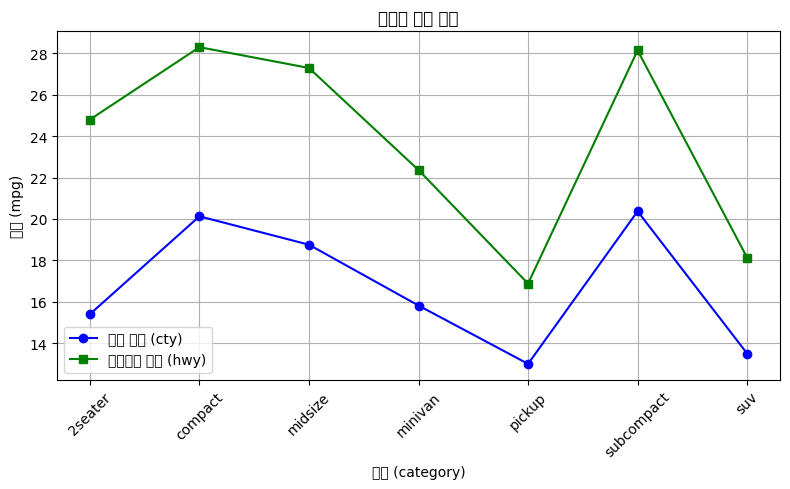

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("../../data/mpg.csv")

# category별로 cty, hwy 평균 계산 후 chart 변수에 저장
chart = df.groupby("category")[["cty", "hwy"]].mean()

# 선 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(chart.index, chart["cty"], marker='o', label='도시 연비 (cty)', color='blue')
plt.plot(chart.index, chart["hwy"], marker='s', label='고속도로 연비 (hwy)', color='green')

# 그래프 꾸미기
plt.title("차종별 평균 연비")
plt.xlabel("차종 (category)")
plt.ylabel("연비 (mpg)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()
